In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = '2012-01-03'
end = '2022-12-23'
stock = 'TSLA'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)

In [4]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,1.929333,1.966667,1.843333,1.872000,1.872000,13921500
1,2012-01-04,1.880667,1.911333,1.833333,1.847333,1.847333,9451500
2,2012-01-05,1.850667,1.862000,1.790000,1.808000,1.808000,15082500
3,2012-01-06,1.813333,1.852667,1.760667,1.794000,1.794000,14794500
4,2012-01-09,1.800000,1.832667,1.741333,1.816667,1.816667,13455000
...,...,...,...,...,...,...,...
2758,2022-12-16,159.639999,160.990005,150.039993,150.229996,150.229996,139032200
2759,2022-12-19,154.000000,155.250000,145.820007,149.869995,149.869995,139390600
2760,2022-12-20,146.050003,148.470001,137.660004,137.800003,137.800003,159563300
2761,2022-12-21,139.339996,141.259995,135.889999,137.570007,137.570007,145417400


In [5]:
ma_100_days = data.Close.rolling(100).mean()

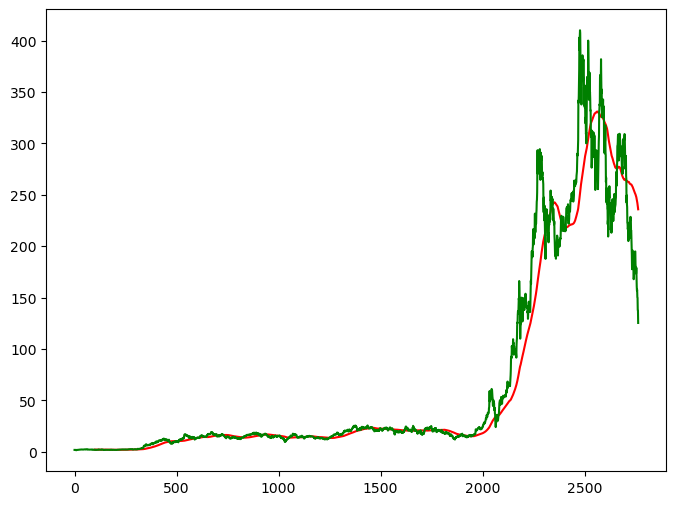

In [6]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [7]:
ma_200_days = data.Close.rolling(200).mean()

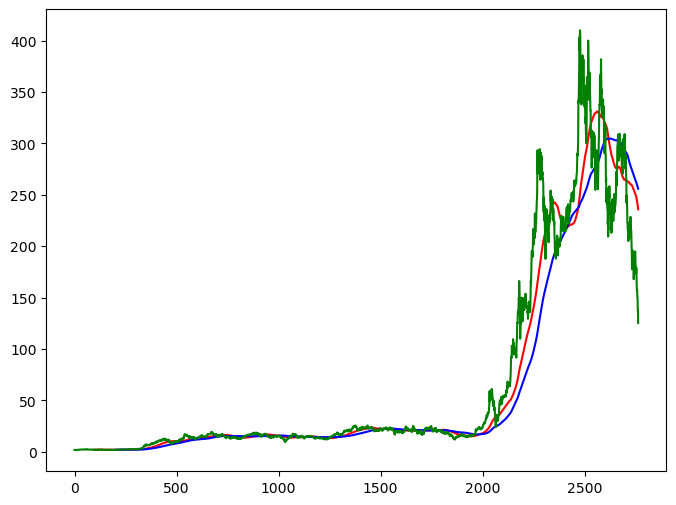

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [9]:
data.dropna(inplace=True)

In [10]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [11]:
data_train.shape[0]

2210

In [12]:
data_test.shape[0]

553

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:
data_train_scale = scaler.fit_transform(data_train)

In [15]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [16]:
x, y = np.array(x), np.array(y)

In [17]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

2024-07-26 09:23:33.716960: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-26 09:23:33.828064: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-26 09:23:33.933284: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-26 09:23:34.014967: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-26 09:23:34.040213: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-26 09:23:34.195360: I tensorflow/core/platform/cpu_feature_gu

In [18]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

/home/pratham2810/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [20]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 94ms/step - loss: 0.0147
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - loss: 0.0030
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - loss: 0.0019
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - loss: 0.0019
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - loss: 0.0016
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - loss: 0.0014
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - loss: 0.0022
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - loss: 0.0013
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - loss: 0.0017
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - loss: 0.0014
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - loss: 0.0020
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - loss: 0.0016
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - loss: 0.0016
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 0.0012
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 0.0014
Ep

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [22]:
pas_100_days = data_train.tail(100)

In [23]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [24]:
data_test_scale  =  scaler.fit_transform(data_test)

In [25]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [26]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


In [27]:
scale =1/scaler.scale_

In [28]:
y_predict = y_predict*scale

In [29]:
y = y*scale

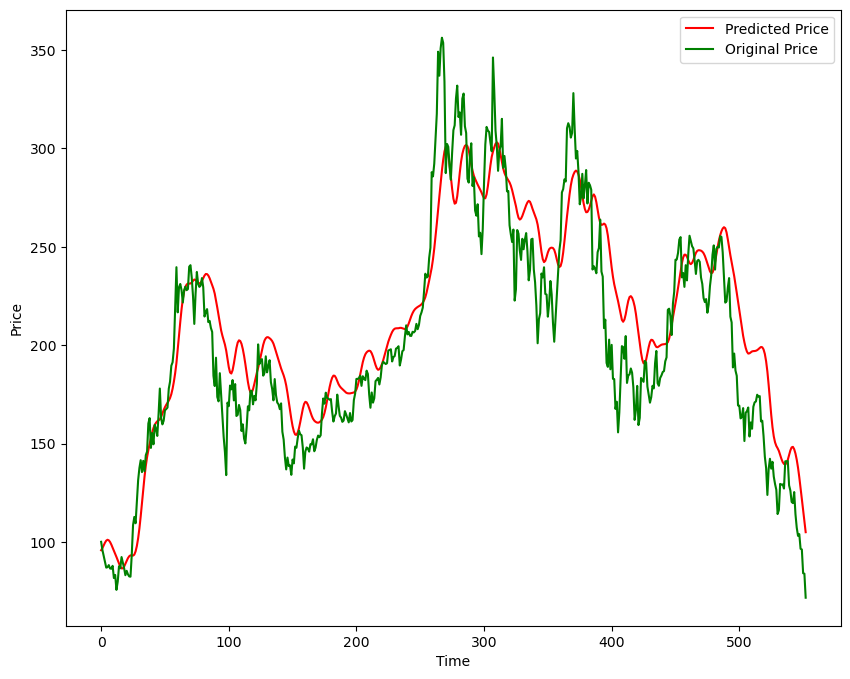

In [30]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [31]:
model.save('Stock Predictions Model.keras')